<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [37]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [38]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/1656856503_447e5b0f03.jpg'),
 PosixPath('datasets/flower_photos/daisy/1140299375_3aa7024466.jpg'),
 PosixPath('datasets/flower_photos/daisy/391364011_5beaaa1ae2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4757448834_a29a9538c9_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16819071290_471d99e166_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1756973583_4aac7df00d_m.jpg')]

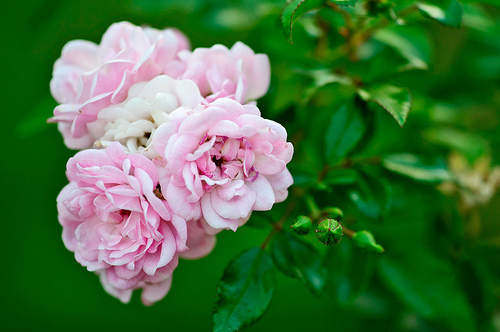

In [8]:
PIL.Image.open(str(roses[0]))

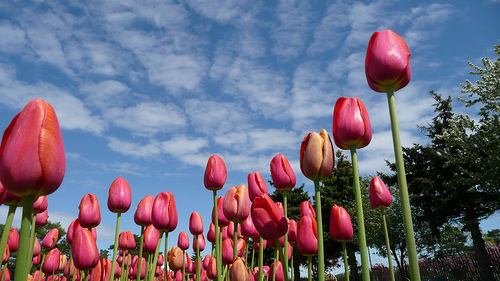

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15802657001_40fe77c030_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1756973583_4aac7df00d_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'

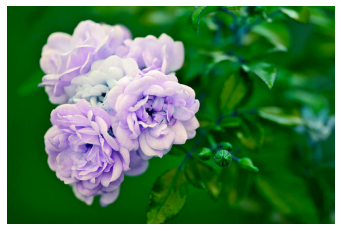

In [14]:
# plt.imshow(plt.imread(str(flowers_images_dict['roses'][0])))
plt.axis("off")
plt.imshow(cv2.imread(str(flowers_images_dict['roses'][0])))

In [15]:
cv2.imread(str(flowers_images_dict['roses'][0]))

array([[[  0,  79,   0],
        [  0,  79,   0],
        [  0,  79,   0],
        ...,
        [  0, 118,   0],
        [  0, 117,   0],
        [  1, 116,   0]],

       [[  0,  79,   0],
        [  0,  79,   0],
        [  0,  79,   0],
        ...,
        [  0, 116,   0],
        [  0, 116,   0],
        [  1, 116,   0]],

       [[  1,  80,   1],
        [  1,  80,   1],
        [  1,  80,   1],
        ...,
        [  1, 115,   1],
        [  2, 116,   2],
        [  1, 115,   1]],

       ...,

       [[  0,  63,   1],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 30,  94,  42],
        [ 36,  98,  50],
        [ 35,  95,  54]],

       [[  0,  62,   0],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 27,  91,  39],
        [ 32,  95,  45],
        [ 33,  94,  50]],

       [[  0,  62,   0],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 24,  88,  36],
        [ 29,  93,  41],
        [ 31,  92,  48]]

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img

array([[[  0,  79,   0],
        [  0,  79,   0],
        [  0,  79,   0],
        ...,
        [  0, 118,   0],
        [  0, 117,   0],
        [  1, 116,   0]],

       [[  0,  79,   0],
        [  0,  79,   0],
        [  0,  79,   0],
        ...,
        [  0, 116,   0],
        [  0, 116,   0],
        [  1, 116,   0]],

       [[  1,  80,   1],
        [  1,  80,   1],
        [  1,  80,   1],
        ...,
        [  1, 115,   1],
        [  2, 116,   2],
        [  1, 115,   1]],

       ...,

       [[  0,  63,   1],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 30,  94,  42],
        [ 36,  98,  50],
        [ 35,  95,  54]],

       [[  0,  62,   0],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 27,  91,  39],
        [ 32,  95,  45],
        [ 33,  94,  50]],

       [[  0,  62,   0],
        [  0,  62,   0],
        [  0,  62,   0],
        ...,
        [ 24,  88,  36],
        [ 29,  93,  41],
        [ 31,  92,  48]]

In [18]:
img.shape

(332, 500, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [23]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [24]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0000001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,

)

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10,callbacks=earlystop)              

Epoch 1/10
86/86 [==============================] - ETA: 0s - loss: 1.4786 - accuracy: 0.3648

86/86 [==============================] - 80s 926ms/step - loss: 1.4786 - accuracy: 0.3648
Epoch 2/10
86/86 [==============================] - ETA: 0s - loss: 1.0948 - accuracy: 0.5745

86/86 [==============================] - 81s 939ms/step - loss: 1.0948 - accuracy: 0.5745
Epoch 3/10
86/86 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.6581

86/86 [==============================] - 79s 923ms/step - loss: 0.9027 - accuracy: 0.6581
Epoch 4/10
86/86 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.7398

86/86 [==============================] - 80s 934ms/step - loss: 0.6820 - accuracy: 0.7398
Epoch 5/10
86/86 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.8110

86/86 [==============================] - 80s 928ms/step - loss: 0.5282 - accuracy: 0.8110
Epoch 6/10
86/86 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8768

86/86 [==============================] - 79s 916ms/step - loss: 0.3510 - accuracy: 0.8768
Epoch 7/10
86/86 [==============================] - ETA: 0s - loss: 0.2142 - accuracy: 0.9284

86/86 [==============================] - 83s 964ms/step - loss: 0.2142 - accuracy: 0.9284
Epoch 8/10
86/86 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9495

86/86 [==============================] - 79s 916ms/step - loss: 0.1476 - accuracy: 0.9495
Epoch 9/10
86/86 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.9757

86/86 [==============================] - 81s 943ms/step - loss: 0.0847 - accuracy: 0.9757
Epoch 10/10
86/86 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9793

86/86 [==============================] - 79s 923ms/step - loss: 0.0779 - accuracy: 0.9793


In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 261ms/step - loss: 2.1709 - accuracy: 0.5969


[2.1709423065185547, 0.5969498753547668]

**Here we see that while train accuracy is very high (85%), the test accuracy is significantly low (62%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [27]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 264ms/step


array([[  1.7769382 ,   8.009157  ,   6.811977  , -11.8597145 ,
         -7.944505  ],
       [  5.5904155 ,  -3.3780756 ,  -4.6656175 ,  -6.930273  ,
          4.1782002 ],
       [  1.0794255 ,   1.3279666 ,  -1.6567537 ,  -0.57862437,
         -0.5912595 ],
       ...,
       [ -3.5204306 ,  -3.1736083 ,   1.5979482 ,   9.970161  ,
         -5.226259  ],
       [ 14.937747  ,  -9.747527  ,  -9.416801  ,  -7.5315137 ,
          3.2659776 ],
       [ -0.5059917 ,   0.75964904,  -0.47346222,   7.1834497 ,
         -6.5776076 ]], dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[0])

In [29]:
np.argmax(score)

1

In [30]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [31]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),

  ]
)

**Original Image**

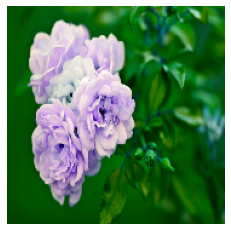

In [32]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

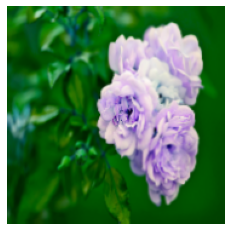

In [33]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [34]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10,callbacks=earlystop)    

Epoch 1/10
86/86 [==============================] - ETA: 0s - loss: 1.4030 - accuracy: 0.3921

86/86 [==============================] - 93s 1s/step - loss: 1.4030 - accuracy: 0.3921
Epoch 2/10
86/86 [==============================] - ETA: 0s - loss: 1.0898 - accuracy: 0.5752

86/86 [==============================] - 90s 1s/step - loss: 1.0898 - accuracy: 0.5752
Epoch 3/10
86/86 [==============================] - ETA: 0s - loss: 0.9644 - accuracy: 0.6308

86/86 [==============================] - 91s 1s/step - loss: 0.9644 - accuracy: 0.6308
Epoch 4/10
86/86 [==============================] - ETA: 0s - loss: 0.8989 - accuracy: 0.6552

86/86 [==============================] - 91s 1s/step - loss: 0.8989 - accuracy: 0.6552
Epoch 5/10
86/86 [==============================] - ETA: 0s - loss: 0.8149 - accuracy: 0.6853

86/86 [==============================] - 92s 1s/step - loss: 0.8149 - accuracy: 0.6853
Epoch 6/10
86/86 [==============================] - ETA: 0s - loss: 0.7952 - accuracy: 0.6973

86/86 [==============================] - 91s 1s/step - loss: 0.7952 - accuracy: 0.6973
Epoch 7/10
86/86 [==============================] - ETA: 0s - loss: 0.7416 - accuracy: 0.7195

86/86 [==============================] - 92s 1s/step - loss: 0.7416 - accuracy: 0.7195
Epoch 8/10
86/86 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.7336

86/86 [==============================] - 92s 1s/step - loss: 0.6960 - accuracy: 0.7336
Epoch 9/10
86/86 [==============================] - ETA: 0s - loss: 0.6558 - accuracy: 0.7489

86/86 [==============================] - 92s 1s/step - loss: 0.6558 - accuracy: 0.7489
Epoch 10/10
86/86 [==============================] - ETA: 0s - loss: 0.6500 - accuracy: 0.7518

86/86 [==============================] - 91s 1s/step - loss: 0.6500 - accuracy: 0.7518


In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 265ms/step - loss: 0.8137 - accuracy: 0.7048


[0.8136974573135376, 0.7047930359840393]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**